In [264]:
import pandas as pd
import plotly.graph_objects as go

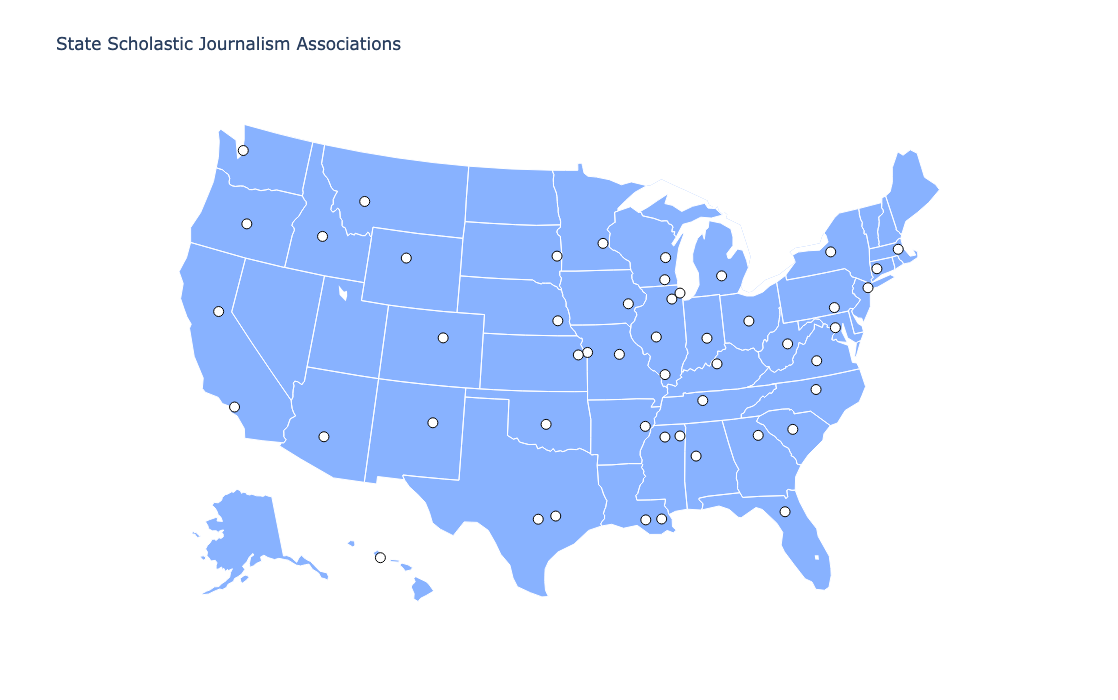

In [265]:
fig1 = go.Figure()

fig1.update_layout(
    title = 'State Scholastic Journalism Associations',
    height = 700)

# Set up the dataframe

alldata = pd.read_csv('assoc_data_1.csv')

# Set up map hover information

# Customize hover text with HTML for styling
alldata['hover_text'] = alldata.apply(
    lambda row: f"<b>{row['Association']}</b><br><br>"
                f"<span style='color: black;'>Click to see more.</span>",
    axis=1
)

# Styling the map

fig1.add_trace(
    go.Scattergeo(lon = alldata['Longitude'],
                  lat = alldata['Latitude'],
                  mode = 'markers',
                  text = alldata['hover_text'],
                  hoverinfo = 'text',
                  marker = dict(color = 'white',
                                line=dict(width=1,
                                        color='Black'),
                                line_color = 'Black',
                                opacity = 1,
                                symbol = 'circle',
                                size = 10),
                  textfont_family = 'Arial',
                  showlegend = False
                 ))

fig1.update_geos(
    scope = 'usa',
    landcolor='#88b2ff')

fig1.show()


In [266]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [267]:
app = dash.Dash(__name__)

In [268]:
alldata

,Association,Established,Website URL,E-Mail,Facebook,Instagram,Twitter,Institutional Affiliation,Funding Sources,Nonprofit Status,...,N E W S L E T T E R F R E Q U E N C Y,W E B S I T E F E A T U R E S:,Upcoming Events,Student Work,Organization History,Member Directory,Other Website Features,Latitude,Longitude,hover_text
0,Alabama Scholastic Press Association (ASPA),1937,"<a href=""https://aspa.ua.edu/"" target=""_blank""...",aspa@ua.edu,https://www.facebook.com/alscpras/,https://www.instagram.com/alabamaspa/?hl=en,@AlaSPA,The University of Alabama,"Membership fees, Service fees, Grants",Yes,...,NaN,NaN,Yes,No,Yes,No,Director's Message,33.2098,-87.5692,<b>Alabama Scholastic Press Association (ASPA)...
1,Arizona Interscholastic Press Association (AIPA),1949,"<a href=""www.azaipa.org/"" target=""_blank"">www....",azstudentpress@gmail.com,https://www.facebook.com/azaipastudentpress/,https://www.instagram.com/azaipa/?hl=en,@AZAIPA,NaN,"Membership fees, Service fees, Event Exhibitor...",Yes,...,NaN,NaN,Yes,No,Yes,Yes,"Amazon Affiliation/Donation, Hall of Fame Reci...",33.4484,-112.0740,<b>Arizona Interscholastic Press Association (...
2,Arkansas Scholastic Press Association (ASPA),1929,"<a href=""www.arkansasscholasticpressassociatio...",info@arkansasscholasticpressassociation.org,https://www.facebook.com/arkansasscholasticpre...,https://www.instagram.com/arkscholasticpressas...,@ASPA1929,NaN,"Sponsoring institution (i.e., a university), M...",Yes,...,NaN,NaN,Yes,No,Yes,Yes,"Award Winner, Call for Donations, Convention D...",35.0093,-90.7852,<b>Arkansas Scholastic Press Association (ASPA...
3,Journalism Education Association of Northern C...,Not disclosed,"<a href=""https://jeanc.org/"" target=""_blank"">h...",jeancprez@gmail.com,https://www.facebook.com/jeaNorCal/,https://www.instagram.com/jeanorcal/,@jeaNorCal,NaN,"Membership fees, Service fees, National confer...",Yes,...,NaN,NaN,No,Yes,No,Yes,"Monthly Photo Contests, Zoom Critiques",38.8375,-120.8958,<b>Journalism Education Association of Norther...
4,Southern California JEA (SCJEA),Not disclosed,"<a href=""http://www.socaljea.org/"" target=""_bl...",socaljea@gmail.com,https://www.facebook.com/KEMPAjournalism,https://www.instagram.com/kempajournalism?utm_...,@KempaSJW,NaN,"Membership fees, Service fees, Event exhibitor...",Yes,...,Not disclosed,NaN,Yes,No,No,Yes,Mentoring Program,34.0549,-118.2426,<b>Southern California JEA (SCJEA)</b><br><br>...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<b>nan</b><br><br><span style='color: black;'>...
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<b>nan</b><br><br><span style='color: black;'>...
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<b>nan</b><br><br><span style='color: black;'>...
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<b>nan</b><br><br><span style='color: black;'>...


In [269]:
column_names = alldata.columns
alldata.columns = alldata.columns.str.replace('WEBSITE FEATURES:', 'WEBSITE FEATURES')

In [270]:
column_names

Index(['Association', 'Established', 'Website URL', 'E-Mail', 'Facebook',
       'Instagram', 'Twitter', 'Institutional Affiliation', 'Funding Sources',
       'Nonprofit Status', 'M A N A G E M E N T',
       'Board Members (Directors or Officers)', 'Manager', 'Manager Title',
       'Continuing or Rotating Manager', 'Paid or Volunteer Manager',
       'Compensation Source', 'Weekly Hours on Association Business (Manager)',
       'O T H E R   P E R S O N N E L', 'Number of Other Paid Positions',
       'Weekly Hours on Association Business (Other Personnel)',
       'Number of Volunteers', 'U N I V E R S I T Y   S U P P O R T',
       'Manager Is a University Employee',
       'Manager's Position University Classification',
       'Manager's % FTE for Association Business', 'Teaching Load',
       'Other Support from University', 'M E M B E R S H I P',
       'Memberships Counted By', 'Number of Members',
       'Number of Member Schools', 'Membership Fee Structure', 'E V E N T S',
 

In [279]:
from dash.dependencies import Input, Output, State  ## Example DataFrame with column names from your dataset
columns = ['Association', 'Established', 'Website URL', 'E-Mail', 'Facebook',
           'Instagram', 'Twitter', 'Institutional Affiliation', 'Funding Sources',
           'Nonprofit Status', 'M A N A G E M E N T', 'Board Members (Directors or Officers)', 
           'Manager', 'Manager Title', 'Continuing or Rotating Manager', 
           'Paid or Volunteer Manager', 'Compensation Source', 
           'Weekly Hours on Association Business (Manager)', 'O T H E R   P E R S O N N E L', 
           'Number of Other Paid Positions', 'Weekly Hours on Association Business (Other Personnel)', 
           'Number of Volunteers', 'U N I V E R S I T Y   S U P P O R T', 
           'Manager Is a University Employee', "Manager's Position University Classification", 
           'Manager\'s % FTE for Association Business', 'Teaching Load', 
           'Other Support from University', 'M E M B E R S H I P', 'Memberships Counted By', 
           'Number of Members', 'Number of Member Schools', 'Membership Fee Structure', 'E V E N T S', 
           'S C H O O L   Y E A R   E V E N T ( S )', 'Event Location(s)', 
           'Registration Fee(s)', 'Number of Schools Attending', 
           'Number of Students Attending', 'S U M M E R   E V E N T ( S )', 
           'Location(s)', 'Registration Fee(s).1', 'Number of Schools Attending.1', 
           'Number of Students Attending.1', 'C R I T I Q U E   C A T E G O R I E S', 
           'Total Critiques Completed per Year', 'Critique Fee(s)', 'A W A R D   C A T E G O R I E S', 
           'Student Awards', 'Educator Awards', 'Publication Awards', 'School Awards', 
           'S C H O L A R S H I P S', 'Number of Scholarships', 'Total Amount Awarded Per Year', 
           'C O M M U N I C A T I O N', 'Main Channel(s)', 'N E W S L E T T E R   F R E Q U E N C Y', 
           'W E B S I T E   F E A T U R E S', 'Upcoming Events', 'Student Work', 'Organization History', 
           'Member Directory', 'Other Website Features']

# Initialize Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    # Text area for displaying columns
    dcc.Textarea(
        id='column-textbox',
        value="\n".join(columns),  # Display the column names in the text box
        style={'width': '100%', 'height': '300px', 'resize': 'none'},
        readOnly=True
    ),
    # A div that will display additional info when a column name is clicked
    html.Div(id='column-info', style={'margin-top': '20px'})
])

@app.callback(
    Output('column-info', 'children'),
    Input('column-textbox', 'n_clicks'),
    State('column-textbox', 'value')
)
def display_column_info(n_clicks, value):
    if n_clicks is None:
        return ""

    # Display info when a column name is clicked
    clicked_column = value.split("\n")[n_clicks - 1]  # Assuming 1 click corresponds to a column
    return f"You clicked on column: {clicked_column}. More details about this column can be displayed here."

if __name__ == '__main__':
    app.run_server(debug=True)

In [280]:
from dash import dcc, html

In [281]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import pandas as pd

# Sample DataFrame (use your actual CSV file here)
alldata = pd.read_csv('assoc_data_1.csv')

# Set up the map figure
fig1 = go.Figure()

# Customize hover text with HTML for styling
alldata['hover_text'] = alldata.apply(
    lambda row: f"<b>{row['Association']}</b><br><br>"
                f"<span style='color: black;'>Click to see more.</span>",
    axis=1
)

# Styling the map
fig1.add_trace(
    go.Scattergeo(lon=alldata['Longitude'],
                  lat=alldata['Latitude'],
                  mode='markers',
                  text=alldata['hover_text'],
                  hoverinfo='text',
                  marker=dict(color='white',
                              line=dict(width=1, color='Black'),
                              line_color='Black',
                              opacity=1,
                              symbol='circle',
                              size=10),
                  textfont_family='Arial',
                  showlegend=False
                 ))

fig1.update_geos(
    scope='usa',
    landcolor='#88b2ff')

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    # Main container to organize layout in a row (flexbox)
    html.Div([
        # Map on the left side
        dcc.Graph(
            id='map',
            figure=fig1,
            config={'scrollZoom': False}  # Disable zoom for map interactions
        ),
        
        # Div containing the Textarea on the right side
        html.Div([
            # Text area for displaying column names
            dcc.Textarea(
                id='column-textbox',
                value="Click a marker on the map to display information here.",
                style={'width': '300px', 'height': '500px', 'resize': 'none', 'display': 'inline-block'},
                readOnly=True
            ),
            # Div to display additional info about the columns
            html.Div(id='column-info', style={'margin-top': '20px'})
        ], style={'display': 'inline-block', 'vertical-align': 'top', 'padding-left': '20px'})
    ], style={'display': 'flex', 'justify-content': 'space-between', 'align-items': 'flex-start'})
])

# Callback for clicking on a marker on the map
@app.callback(
    [Output('column-textbox', 'value'),
     Output('column-info', 'children')],
    [Input('map', 'clickData')]  # Get clicked position (lat, lng)
)
def update_textbox_and_info(clickData):
    # When a map marker is clicked, extract the clicked point index
    if clickData:
        # Get the index of the clicked point in the data
        point_index = clickData['points'][0]['pointIndex']
        
        # Retrieve corresponding row data from the dataframe
        row_data = alldata.iloc[point_index]
        
        # Prepare the value for the Textarea (Display all columns)
        textbox_content = f"{row_data['Association']}\n\n"  # Only the association name/content, no "Association:"
        
        # Loop through all columns in the dataframe and add them to the Textarea
        for col in alldata.columns:
            # Skip Latitude, Longitude, and hover_text columns if you don't need them in the Textarea
            if col not in ['Latitude', 'Longitude', 'hover_text']:
                value = row_data[col]
                # Add space before and after only if the column name is capitalized
                if col.isupper():  # Check if the column name is all uppercase
                    textbox_content += f"\n\n{col}: {value}\n\n"  # Add space before and after capitalized columns
                else:
                    textbox_content += f"\n{col}: {value}\n"  # No extra space for non-capitalized columns
        
        # Return the updated content for the Textarea and the detailed info
        return (
            textbox_content,  # Update Textarea content
            html.Div([  # Display additional information for that row
                html.H4(f"Details for {row_data['Association']}"),
                html.P(f"Established: {row_data['Established']}"),
                html.P(f"Institutional Affiliation: {row_data['Institutional Affiliation']}"),
                html.P(f"Number of Members: {row_data['Number of Members']}"),
                html.P(f"Website: {row_data['Website URL']}"),
                html.P(f"E-Mail: {row_data['E-Mail']}")
                # Add more information here if needed
            ])
        )
    
    # Default message when no marker is clicked
    return (
        "Click a marker on the map to display information here.",  # Default value for Textarea
        "Click on a marker for more information."  # Default message
    )

if __name__ == '__main__':
    app.run_server(debug=True)


In [278]:
# Set up the map figure
FinalFigure1 = go.Figure()

# Customize hover text with HTML for styling
alldata['hover_text'] = alldata.apply(
    lambda row: f"<b>{row['Association']}</b><br><br>"
                f"<span style='color: black;'>Click to see more.</span>",
    axis=1
)

# Styling the map
FinalFigure1.add_trace(
    go.Scattergeo(lon=alldata['Longitude'],
                  lat=alldata['Latitude'],
                  mode='markers',
                  text=alldata['hover_text'],
                  hoverinfo='text',
                  marker=dict(color='white',
                              line=dict(width=1, color='Black'),
                              line_color='Black',
                              opacity=1,
                              symbol='circle',
                              size=10),
                  textfont_family='Arial',
                  showlegend=False
                 ))

FinalFigure1.update_geos(
    scope='usa',
    landcolor='#88b2ff')

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    # Main container to organize layout in a row (flexbox)
    html.Div([
        # Map on the left side (fixed size of 700px height)
        dcc.Graph(
            id='map',
            figure=fig1,
            config={'scrollZoom': False},  # Disable zoom for map interactions
            style={'height': '700px'}  # Keep map height fixed
        ),
        
        # Div containing the additional text on the right side
        html.Div([
            # Div to display additional info about the columns
            html.Div(id='column-info', style={'margin-top': '20px', 'white-space': 'pre-wrap'})
        ], id="info-box", style={
            'position': 'absolute',
            'top': '10%',
            'right': '2%',
            'width': '350px',  # Adjust width of the info box
            'max-height': '90%',
            'overflow-y': 'auto',
            'background': 'rgba(255, 255, 255, 0.9)',  # Slightly transparent background
            'padding': '10px',
            'border-radius': '8px',
            'box-shadow': '0 4px 8px rgba(0, 0, 0, 0.2)',
            'display': 'none'  # Initially hidden
        })
    ], style={'position': 'relative', 'width': '100%', 'height': '100vh'})  # Full screen container
])

# Callback for clicking on a marker on the map
@app.callback(
    Output('column-info', 'children'),
    Output('info-box', 'style'),
    Input('map', 'clickData')
)
def update_info(clickData):
    if clickData:
        # Extract the clicked point index
        point_index = clickData['points'][0]['pointIndex']
        
        # Retrieve corresponding row data from the dataframe
        row_data = alldata.iloc[point_index]
        
        # Prepare the content for the text (Display all columns)
        info_content = [html.B(row_data['Association'])]  # Bold the association name

        # Add a space (empty <p>) between the title and the first column
        info_content.append(html.P())  # Empty paragraph for space
       
        # Loop through all columns in the dataframe and add them to the info
        for col in alldata.columns:
            # Skip Latitude, Longitude, and hover_text columns if you don't need them
            if col not in ["Association", 'Latitude', 'Longitude', 'hover_text']:
                value = row_data[col]
                # Replace NaN with an empty string for display
                if pd.isna(value):
                    value = ""  # Replace NaN with empty string
                
                # Check if the column is capitalized and needs extra space
                if col.isupper():
                    # Add extra space before and after capitalized columns (10px)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '10px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom
                else:
                    # Normal behavior for non-capitalized columns (5px padding)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'wordWrap': 'break-word', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '5px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom

        # Return the updated content and show the info box
        return info_content, {'display': 'block'}  # Show the info box when a marker is clicked
    
    # If no marker is clicked, hide the info box
    return "Click on a marker for more information.", {'display': 'none'}

if __name__ == '__main__':
    app.run_server(debug=True)


In [282]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd

# Sample DataFrame (use your actual CSV file here)
alldata = pd.read_csv('assoc_data_1.csv')

# Set up the map figure
fig1 = go.Figure()

# Customize hover text with HTML for styling
alldata['hover_text'] = alldata.apply(
    lambda row: f"<b>{row['Association']}</b><br><br>"
                f"<span style='color: black;'>Click to see more.</span>",
    axis=1
)

# Styling the map
fig1.add_trace(
    go.Scattergeo(lon=alldata['Longitude'],
                  lat=alldata['Latitude'],
                  mode='markers',
                  text=alldata['hover_text'],
                  hoverinfo='text',
                  marker=dict(color='white',
                              line=dict(width=1, color='Black'),
                              line_color='Black',
                              opacity=1,
                              symbol='circle',
                              size=10),
                  textfont_family='Arial',
                  showlegend=False
                 ))

fig1.update_geos(
    scope='usa',
    landcolor='#88b2ff')

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    # Main container to organize layout in a row (flexbox)
    html.Div([
        # Map on the left side (fixed size of 700px height)
        dcc.Graph(
            id='map',
            figure=fig1,
            config={'scrollZoom': False},  # Disable zoom for map interactions
            style={'height': '700px'}  # Keep map height fixed
        ),
        
        # Div containing the additional text on the right side
        html.Div([
            # Div to display additional info about the columns
            html.Div(id='column-info', style={'margin-top': '20px', 'white-space': 'pre-wrap'})
        ], id="info-box", style={
            'position': 'absolute',
            'top': '10%',
            'right': '2%',
            'width': '350px',  # Adjust width of the info box
            'max-height': '90%',
            'overflow-y': 'auto',
            'background': 'rgba(255, 255, 255, 0.9)',  # Slightly transparent background
            'padding': '10px',
            'border-radius': '8px',
            'box-shadow': '0 4px 8px rgba(0, 0, 0, 0.2)',
            'display': 'none'  # Initially hidden
        })
    ], style={'position': 'relative', 'width': '100%', 'height': '100vh'})  # Full screen container
])

# Callback for clicking on a marker on the map
@app.callback(
    Output('column-info', 'children'),
    Output('info-box', 'style'),
    Input('map', 'clickData')
)
def update_info(clickData):
    if clickData:
        # Extract the clicked point index
        point_index = clickData['points'][0]['pointIndex']
        
        # Retrieve corresponding row data from the dataframe
        row_data = alldata.iloc[point_index]
        
        # Prepare the content for the text (Display all columns)
        info_content = [html.B(row_data['Association'])]  # Bold the association name

        # Add a space (empty <p>) between the title and the first column
        info_content.append(html.P())  # Empty paragraph for space
       
        # Loop through all columns in the dataframe and add them to the info
        for col in alldata.columns:
            # Skip Latitude, Longitude, and hover_text columns if you don't need them
            if col not in ["Association", 'Latitude', 'Longitude', 'hover_text']:
                value = row_data[col]
                # Replace NaN with an empty string for display
                if pd.isna(value):
                    value = ""  # Replace NaN with empty string
                
                # Check if the column is capitalized and needs extra space
                if col.isupper():
                    # Add extra space before and after capitalized columns (10px)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'wordWrap': 'break-word', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '10px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom
                else:
                    # Normal behavior for non-capitalized columns (5px padding)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'wordWrap': 'break-word', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '5px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom

        # Return the updated content and show the info box
        return info_content, {'display': 'block'}  # Show the info box when a marker is clicked
    
    # If no marker is clicked, hide the info box
    return "Click on a marker for more information.", {'display': 'none'}

if __name__ == '__main__':
    app.run_server(debug=True)


In [284]:
# Set up the map figure
finalfig2 = go.Figure()

# Customize hover text with HTML for styling
alldata['hover_text'] = alldata.apply(
    lambda row: f"<b>{row['Association']}</b><br><br>"
                f"<span style='color: black;'>Click to see more.</span>",
    axis=1
)

# Styling the map
finalfig2.add_trace(
    go.Scattergeo(lon=alldata['Longitude'],
                  lat=alldata['Latitude'],
                  mode='markers',
                  text=alldata['hover_text'],
                  hoverinfo='text',
                  marker=dict(color='white',
                              line=dict(width=1, color='Black'),
                              line_color='Black',
                              opacity=1,
                              symbol='circle',
                              size=10),
                  textfont_family='Arial',
                  showlegend=False
                 ))

finalfig2.update_geos(
    scope='usa',
    landcolor='#88b2ff')

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    # Main container to organize layout in a row (flexbox)
    html.Div([
        # Map on the left side
        dcc.Graph(
            id='map',
            figure=fig1,
            config={'scrollZoom': False}  # Disable zoom for map interactions
        ),
        
        # Div containing the additional text on the right side
        html.Div([
            # Div to display additional info about the columns
            html.Div(id='column-info', style={'margin-top': '20px', 'white-space': 'pre-wrap'})
        ], style={'display': 'inline-block', 'vertical-align': 'top', 'padding-left': '20px', 'max-height': '500px', 'overflow-y': 'auto'})
    ], style={'display': 'flex', 'justify-content': 'space-between', 'align-items': 'flex-start'})
])

# Callback for clicking on a marker on the map
@app.callback(
    Output('column-info', 'children'),
    Input('map', 'clickData')
)
def update_info(clickData):
    # If a map marker is clicked, extract the clicked point index
    if clickData:
        point_index = clickData['points'][0]['pointIndex']
        
        # Retrieve corresponding row data from the dataframe
        row_data = alldata.iloc[point_index]
        
        # Prepare the content for the text (Display all columns)
        info_content = [html.B(row_data['Association'])]  # Bold the association name

        # Add a space (empty <p>) between the title and the first column
        info_content.append(html.P())  # Empty paragraph for space
       
        # Loop through all columns in the dataframe and add them to the info
        for col in alldata.columns:
            # Skip Latitude, Longitude, and hover_text columns if you don't need them
            if col not in ["Association", 'Latitude', 'Longitude', 'hover_text']:
                value = row_data[col]
                # Replace NaN with an empty string for display
                if pd.isna(value):
                    value = ""  # Replace NaN with empty string
                
                # Check if the column is capitalized and needs extra space
                if col.isupper():
                    # Add extra space before and after capitalized columns (10px)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '10px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom
                else:
                    # Normal behavior for non-capitalized columns (5px padding)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'wordWrap': 'break-word', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '5px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom

        # Return the updated content for the info div
        return info_content
    
    # Default message when no marker is clicked
    return "Click on a marker for more information."

if __name__ == '__main__':
    app.run_server(debug=True)


In [289]:
# Set up the map figure
finalfig3 = go.Figure()

# Customize hover text with HTML for styling
alldata['hover_text'] = alldata.apply(
    lambda row: f"<b>{row['Association']}</b><br><br>"
                f"<span style='color: black;'>Click to see more.</span>",
    axis=1
)

# Styling the map
finalfig3.add_trace(
    go.Scattergeo(lon=alldata['Longitude'],
                  lat=alldata['Latitude'],
                  mode='markers',
                  text=alldata['hover_text'],
                  hoverinfo='text',
                  marker=dict(color='white',
                              line=dict(width=1, color='Black'),
                              line_color='Black',
                              opacity=1,
                              symbol='circle',
                              size=10),
                  textfont_family='Arial',
                  showlegend=False
                 ))

finalfig3.update_geos(
    scope='usa',
    landcolor='#88b2ff')

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    # Main container to organize layout in a row (flexbox)
    html.Div([
        # Map on the left side (take up most of the space)
        dcc.Graph(
            id='map',
            figure=fig1,
            config={'scrollZoom': False}  # Disable zoom for map interactions
        ),
        
        # Div containing the additional text on the right side
        html.Div([
            # Div to display additional info about the columns
            html.Div(id='column-info', style={'margin-top': '20px', 'white-space': 'pre-wrap'})
        ], id="info-box", style={
            'position': 'absolute',
            'top': '10%',
            'right': '10%',
            'width': '400px',
            'max-height': '90%',
            'overflow-y': 'auto',
            'background': 'rgba(255, 255, 255, 0.9)',  # Slightly transparent background
            'padding': '10px',
            'border-radius': '8px',
            'box-shadow': '0 4px 8px rgba(0, 0, 0, 0.2)',
            'display': 'none'  # Initially hidden
        })
    ], style={'position': 'relative', 'width': '100%', 'height': '100vh'})  # Full screen container
])
        # Function to split capitalized words into individual words
def split_capitalized_words(text):
    # Use regex to insert space between capital and lowercase letters
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    
# Callback for clicking on a marker on the map
@app.callback(
    Output('column-info', 'children'),
    Output('info-box', 'style'),
    Input('map', 'clickData')
)
def update_info(clickData):
    if clickData:
        # Extract the clicked point index
        point_index = clickData['points'][0]['pointIndex']
        
        # Retrieve corresponding row data from the dataframe
        row_data = alldata.iloc[point_index]
        
        # Prepare the content for the text (Display all columns)
        info_content = [html.B(row_data['Association'])]  # Bold the association name

        # Add a space (empty <p>) between the title and the first column
        info_content.append(html.P())  # Empty paragraph for space
       
        # Loop through all columns in the dataframe and add them to the info
        for col in alldata.columns:
            # Skip Latitude, Longitude, and hover_text columns if you don't need them
            if col not in ["Association", 'Latitude', 'Longitude', 'hover_text']:
                value = row_data[col]
                # Replace NaN with an empty string for display
                if pd.isna(value):
                    value = ""  # Replace NaN with empty string
                
                # Check if the column is capitalized and needs extra space
                if col.isupper():
                    # Add extra space before and after capitalized columns (10px)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'wordWrap': 'break-word', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '10px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom
                else:
                    # Normal behavior for non-capitalized columns (5px padding)
                    info_content.append(html.Div([
                        html.Div(col, style={'flex': '1', 'textAlign': 'left', 'wordWrap': 'break-word', 'whiteSpace': 'normal'}),  # Column name (left)
                        html.Div(value, style={'flex': '1', 'textAlign': 'right', 'whiteSpace': 'normal'})  # Value (right)
                    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '5px 0', 'border-bottom': '1px solid #ccc'}))  # Add border at bottom

        # Return the updated content and show the info box
        return info_content, {'display': 'block'}  # Show the info box when a marker is clicked
    
    # If no marker is clicked, hide the info box
    return "Click on a marker for more information.", {'display': 'none'}

if __name__ == '__main__':
    app.run_server(debug=True)
